In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [48]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 2 columns):
Chirps/Second         15 non-null float64
Ground Temperature    15 non-null float64
dtypes: float64(2)
memory usage: 360.0 bytes


In [51]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [41]:
# x = Ground Temp y = Chirps(What we are trying to predict)

In [55]:
df = df.rename(columns={"Chirps/Second": "chirps", "Ground Temperature": "temp"})

In [80]:
df.head()

,chirps,temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


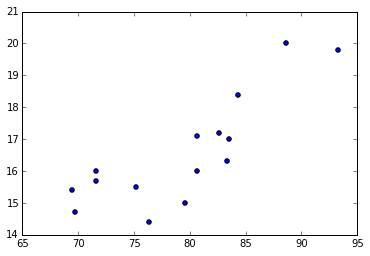

In [61]:
plt.scatter(df['temp'], df['chirps'])
plt.show()

In [66]:
predict_chirp = df['chirps']
ground_temp = df['temp']

In [70]:
transposed_chrip = np.array(predict_chirp.values).reshape((-1, 1))
transposed_chrip

array([[ 20. ],
       [ 16. ],
       [ 19.8],
       [ 18.4],
       [ 17.1],
       [ 15.5],
       [ 14.7],
       [ 15.7],
       [ 15.4],
       [ 16.3],
       [ 15. ],
       [ 17.2],
       [ 16. ],
       [ 17. ],
       [ 14.4]])

In [82]:
transposed_temp = np.array(ground_temp.values).reshape((-1, 1))
transposed_temp

array([[ 88.6],
       [ 71.6],
       [ 93.3],
       [ 84.3],
       [ 80.6],
       [ 75.2],
       [ 69.7],
       [ 71.6],
       [ 69.4],
       [ 83.3],
       [ 79.6],
       [ 82.6],
       [ 80.6],
       [ 83.5],
       [ 76.3]])

In [102]:
regr1 = linear_model.LinearRegression()
regr1.fit(transposed_temp, predict_chirp)
print('Coefficients: \n', regr1.coef_)
print(regr1.score(transposed_temp, transposed_chrip))

Coefficients: 
 [ 0.20299973]
0.692294652915


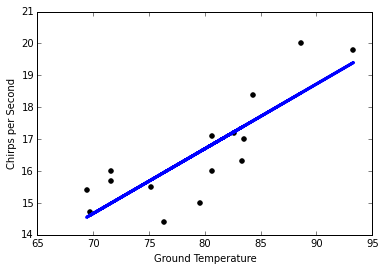

In [125]:
plt.scatter(transposed_temp, transposed_chrip,  color='black')
plt.plot(transposed_temp, regr1.predict(transposed_temp), color='blue', linewidth=3)
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps per Second')
plt.show()

In [101]:
regr1.predict(transposed_temp)

array([ 18.44509085,  14.99409541,  19.39918959,  17.572192  ,
        16.821093  ,  15.72489445,  14.60839592,  14.99409541,
        14.547496  ,  17.36919227,  16.61809327,  17.22709246,
        16.821093  ,  17.40979222,  15.94819415])

In [91]:
print(regr1.score(transposed_temp, transposed_chrip))

0.692294652915


In [93]:
regr1.predict(95)

array([[ 19.74428913]])

In [94]:
regr2 = linear_model.LinearRegression()
regr2.fit(transposed_chrip, transposed_temp)
print('Coefficients: \n', regr2.coef_)
print(regr2.score(transposed_chrip, transposed_temp))

Coefficients: 
 [[ 3.410323]]
0.692294652915


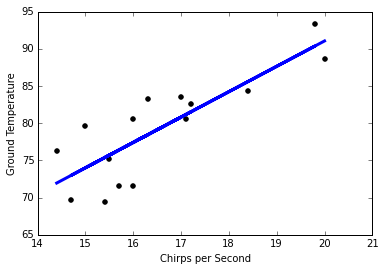

In [124]:
plt.scatter(transposed_chrip, transposed_temp,  color='black')
plt.plot(transposed_chrip, regr2.predict(transposed_chrip), color='blue', linewidth=3)
plt.xlabel('Chirps per Second')
plt.ylabel('Ground Temperature')
plt.show()

In [96]:
regr2.predict(18)

array([[ 84.2347963]])

In [103]:
regr1.predict(84.2)

array([ 17.55189203])

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [105]:
df = pd.read_fwf("brain_body.txt")

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 2 columns):
Brain    62 non-null float64
Body     62 non-null float64
dtypes: float64(2)
memory usage: 1.5 KB


In [108]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [109]:
brain = df['Brain']
body = df['Body']

In [113]:
transposed_brain = np.array(brain.values).reshape((-1, 1))
transposed_body = np.array(body.values).reshape((-1, 1))

In [206]:
regr11 = linear_model.LinearRegression()
regr11.fit(transposed_brain, transposed_body)
print('Coefficients: \n', regr11.coef_)
print(regr11.score(transposed_brain, transposed_body))

Coefficients: 
 [[ 0.96649637]]
0.872662084304


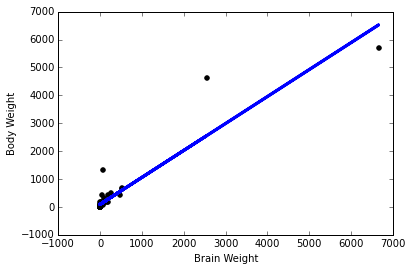

In [131]:
plt.scatter (transposed_brain, transposed_body,  color='black')
plt.plot(transposed_brain, regr11.predict(transposed_brain), color='blue', linewidth=3)
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

# This produces a better score

In [204]:
regr22 = linear_model.LinearRegression()
regr22.fit(transposed_body, transposed_brain)
print('Coefficients: \n', regr11.coef_)
print(regr22.score(transposed_body, transposed_brain))

Coefficients: 
 [[ 0.96649637]]
0.872662084304


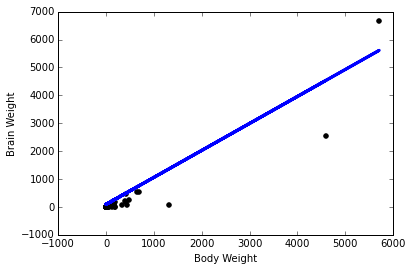

In [135]:
plt.scatter (transposed_body, transposed_brain,  color='black')
plt.plot(transposed_body, regr11.predict(transposed_body), color='blue', linewidth=3)
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [133]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 6 columns):
Sex       52 non-null int64
Rank      52 non-null int64
Year      52 non-null int64
Degree    52 non-null int64
YSdeg     52 non-null int64
Salary    52 non-null int64
dtypes: int64(6)
memory usage: 2.8 KB


In [137]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [152]:
import itertools
dependent_vars = list(df.columns)
dependent_vars.remove('Salary')
combos = list(itertools.combinations(dependent_vars, 2))
combo3 = list(itertools.combinations(dependent_vars, 3))
combo4 = list(itertools.combinations(dependent_vars, 4))
combo5 = list(itertools.combinations(dependent_vars, 5))

In [153]:
def regression_for(combo):
    combo = list(combo)
    df2 = df.loc[:, combo + ['Salary']]
    df2.dropna(inplace=True)
    input_data = df2[combo]
    money = df2['Salary']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, money)
    return regr, regr.score(input_data, money)

# Results with a combo of 2

In [159]:
choices = []

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_) 

(('Rank', 'Year'), 0.84364809332645985)
[ 4731.2563918   376.4992803] 11336.6654314


# Results with a combo of 3

In [160]:
choices = []

for combo in combo3:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_) 

(('Rank', 'Year', 'YSdeg'), 0.84567257644855964)
[ 4973.64328882   405.67105071   -40.86497467] 11282.896566


# Results with a combo of 4

In [161]:
choices = []

for combo in combo4:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_) 

(('Sex', 'Rank', 'Year', 'YSdeg'), 0.84903661922628515)
[  867.3408978   5092.47452621   442.16048711   -57.04193989] 10794.8777652


# Results with a combo of all

In [162]:
choices = []

for combo in combo5:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_) 

(('Sex', 'Rank', 'Year', 'Degree', 'YSdeg'), 0.85471806744109691)
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354] 11410.1465473


### Ok so when you compare all 5 columns to Salary you get a score of .85 which is better than any other combination

### So lets see if a persons Gender is a factor in their salary!

In [180]:
gender = df['Sex']
salary = df['Salary']

In [181]:
transposed_gender = np.array(gender.values).reshape((-1, 1))
transposed_salary = np.array(salary.values).reshape((-1, 1))


In [185]:
regrmoney = linear_model.LinearRegression()
regrmoney.fit(transposed_salary, transposed_gender)
print('Coefficients: \n', regr11.coef_)
print(regr1.score(transposed_salary, transposed_gender))

Coefficients: 
 [[ 0.96649637]]
-121376450.641


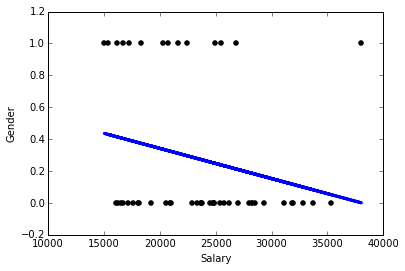

In [203]:
plt.scatter (transposed_salary, transposed_gender,  color='black')
plt.plot(transposed_salary, regrmoney.predict(transposed_salary), color='blue', linewidth=3)
plt.xlabel('Salary')
plt.ylabel('Gender')
plt.show()

# Overall Men make more money than Women, but the data does show that there is a single Woman who makes more than anyone.